In [ ]:
import pandas as pd
import os
import sys
import zipfile
from chifolio.calendar import MONTH_END, WEEK_END
from chifolio.factor import cal_ic,ic_statistic
from chifolio.measure import create_return_risk_metrics
from chifolio.backtest import Backtest
from chifolio.factor import winsorize,xsigma,xmad,adjboxplot,normalize,neutralize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")  # ÂøΩÁï•ÊâÄÊúâË≠¶Âëä

# ËØªÂèñÊï∞ÊçÆ

## ËÇ°ÂêßÊï∞ÊçÆ

In [ ]:
# ‰ªéÁà∂ÁõÆÂΩïËé∑ÂèñdataË∑ØÂæÑ
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_path = os.path.join(os.path.join(parent_dir, 'data'),'datago')

# ÊâìÂºÄdatagoÊï∞ÊçÆÊñá‰ª∂
file_path = os.path.join(os.path.join(data_path,'GACRIS-V3_natural_day_basic_stat'),'GACRIS-V3_natural_day_basic_stat_20200101to20241231.csv')
natural_day_basic = pd.read_csv(file_path)

natural_day_basic['pub_date'] = pd.to_datetime(natural_day_basic['pub_date'])
natural_day_basic.rename(columns={'pub_date':'date','stock_id':'asset'}, inplace=True)
df_factor = natural_day_basic[['date','asset','senti_conform']].copy()

In [ ]:
natural_day_basic.head()

asset          figi       date  read_neg_sum  reply_neg_sum  \
0  000001.SZ  BBG000BZDPV5 2020-01-01          1436              1   
1  000002.SZ  BBG000BZ9Z48 2020-01-01         21399             26   
2  000004.SZ  BBG000BZFT18 2020-01-01             0              0   
3  000005.SZ  BBG000BZDNK2 2020-01-01             0              0   
4  000006.SZ  BBG000BZFR12 2020-01-01          1531              1   

   post_neg_sum  user_neg  user_avg_bar_age_neg  read_neu_sum  reply_neu_sum  \
0             2         2                   913           675              2   
1             7         6                  1241          3364              2   
2             0         0                     0           361              0   
3             0         0                     0             0              0   
4             2         2                  1451             0              0   

   ...  user_pos  user_avg_bar_age_pos  read_all_sum  reply_all_sum  \
0  ...         4                   946          5711              8   
1  ...        12                   860         41135             46   
2  ...         1                   273          1058              0   
3  ...         1                  2337           744              3   
4  ...         0                     0          1531              1   

   post_all_sum  user_all  user_avg_bar_age_all  senti_score_div  \
0             7         7                   806         0.285714   
1            21        19                  1018         0.285714   
2             2         2                   977         0.500000   
3             1         1                  2337         1.000000   
4             2         2                  1451        -1.000000   

   senti_score_log  senti_conform  
0         0.510826       0.041685  
1         0.559616       0.041685  
2         0.693147       0.133975  
3         0.693147       1.000000  
4        -1.098610       1.000000  

[5 rows x 26 columns]

## ËÇ°Á•®Êï∞ÊçÆ

In [ ]:
# ËØªÂèñÂÖ®AËÇ°‰ª∑Ê†ºÊñá‰ª∂
data_path = os.path.join(parent_dir, 'data')
file_path =  os.path.join(data_path, 'price_daily.h5')
df_price = pd.read_hdf(file_path, key='/data')

# Á≠õÈÄâ2020-2024ÁöÑÂÖ®A‰ª∑Ê†ºÊï∞ÊçÆ
start_date='2020-01-01'
end_date='2024-12-31'
df_price_filtered = df_price.loc[start_date:end_date]

In [ ]:
df_price_filtered.head()

asset       000001.SZ  000002.SZ  000004.SZ  000005.SZ  000006.SZ  000007.SZ  \
date                                                                           
2020-01-02  1841.6882  4832.2920    90.7460    29.1003   191.3002    79.1077   
2020-01-03  1875.5308  4756.6019    90.8273    29.1929   194.1343    78.7764   
2020-01-06  1863.5221  4676.4595    88.3890    29.1929   193.4257    78.5278   
2020-01-07  1872.2557  4713.5625    89.8114    29.6563   194.4885    78.7764   
2020-01-08  1818.7627  4701.6895    88.5109    29.1929   190.9459    77.8652   

asset       000008.SZ  000009.SZ  000010.SZ  000011.SZ  ...  001356.SZ  \
date                                                    ...              
2020-01-02    82.8549    59.0007    36.7412    34.2681  ...        NaN   
2020-01-03    83.7482    56.6974    36.7412    34.1960  ...        NaN   
2020-01-06    83.3015    62.3672    36.9567    33.8357  ...        NaN   
2020-01-07    84.6415    63.4302    38.1419    34.4122  ...        NaN   
2020-01-08    83.0782    62.9873    37.8187    33.4753  ...        NaN   

asset       301602.SZ  688545.SH  001395.SZ  688411.SH  920108.BJ  302132.SZ  \
date                                                                           
2020-01-02        NaN        NaN        NaN        NaN        NaN        NaN   
2020-01-03        NaN        NaN        NaN        NaN        NaN        NaN   
2020-01-06        NaN        NaN        NaN        NaN        NaN        NaN   
2020-01-07        NaN        NaN        NaN        NaN        NaN        NaN   
2020-01-08        NaN        NaN        NaN        NaN        NaN        NaN   

asset       301173.SZ  301557.SZ  603409.SH  
date                                         
2020-01-02        NaN        NaN        NaN  
2020-01-03        NaN        NaN        NaN  
2020-01-06        NaN        NaN        NaN  
2020-01-07        NaN        NaN        NaN  
2020-01-08        NaN        NaN        NaN  

[5 rows x 5669 columns]

# ÂàÜÊ≠ßÂõ†Â≠êÊúàÈ¢ëÊµãËØï

## ÂÖ®A

In [ ]:
# Áº©Â∞èÊó•ÊúüËåÉÂõ¥
end_dates = pd.DatetimeIndex(MONTH_END)
min_date = natural_day_basic['date'].min()
max_date = natural_day_basic['date'].max()
relevant_end_dates = end_dates[(end_dates >= min_date) & (end_dates <= max_date)]

In [ ]:
def ic_table(factors, descriptor, df_price, date_list,universe=None):
    results = []
    for f in factors:
        series = ic_statistic(cal_ic(descriptor[f], df_price, date_list, block=universe))
        series.name = f
        results.append(series)
    return pd.DataFrame(results)

In [ ]:
# Â≠òÂÇ®ÊúÄÁªàÁöÑËÅöÂêàÁªìÊûú
result_list = []
lookback_days = 20
min_days = 10
trading_dates = df_price_filtered.index

# ÈÅçÂéÜÊØè‰∏™Ë∞É‰ªìÊó•
for end_date in relevant_end_dates:

    # ÊâæÂà∞ end_date ‰πãÂâçÁöÑ lookback_days ‰∏™‰∫§ÊòìÊó•
    trading_days_before_end = trading_dates[trading_dates < end_date][-lookback_days:]
    start_date = trading_days_before_end[0] 


    # Á≠õÈÄâ df_factors ‰∏≠Êó•ÊúüÂú® [start_date, end_date] Âå∫Èó¥ÂÜÖÁöÑÊï∞ÊçÆ
    lookback_df = natural_day_basic[(natural_day_basic['date'] >= start_date) & (natural_day_basic['date'] < end_date)]

    # ÁªüËÆ°ÊØè‰∏™ËÇ°Á•®Âú®ËøôÊÆµÊó∂Èó¥ÁöÑÊúâÊïàÂ§©Êï∞
    news_days = lookback_df.groupby("asset")["senti_conform"].count()

    # Á≠õÂá∫Êª°Ë∂≥ min_days Ë¶ÅÊ±ÇÁöÑ asset
    qualified_assets = news_days[news_days >= min_days].index
    
    # ËÆ°ÁÆóÊâÄÈúÄÁöÑÁªüËÆ°ÊåáÊ†á
    group_factors = lookback_df.groupby('asset').agg(
        senti_score_div=('senti_score_div', 'mean'),  
        senti_score_log=('senti_score_log', 'mean'),  
        senti_conform=('senti_conform', 'mean')  
    ).reset_index()
    
    # Âè™‰øùÁïôÊª°Ë∂≥Ë¶ÜÁõñÁéáÊù°‰ª∂ÁöÑËµÑ‰∫ß
    group_factors = group_factors[group_factors['asset'].isin(qualified_assets)]
    
    # Ê∑ªÂä†Ë∞É‰ªìÊó•ÂàóÔºåÊñπ‰æøÂêéÁª≠ÂØπÈΩê
    group_factors['date'] = end_date

    # Â≠òÂÖ•ÁªìÊûúÂàóË°®
    result_list.append(group_factors)

# ÂêàÂπ∂ÊâÄÊúâÁªìÊûú
df_final = pd.concat(result_list, ignore_index=True)

In [ ]:
descriptor_month = df_final.copy()
descriptor_month.set_index(['date','asset'],inplace=True)
descriptor_month = descriptor_month.sort_index()

factors = ['senti_score_div','senti_score_log','senti_conform']
ic_results_monthly_a = ic_table(factors, descriptor_month, df_price_filtered, MONTH_END)

In [ ]:
ic_results_monthly_a

IC     ICSTD        IR         T
senti_score_div -0.013955  0.083854 -0.166420 -1.278298
senti_score_log -0.005529  0.091044 -0.060725 -0.466438
senti_conform    0.062876  0.097771  0.643091  4.939676

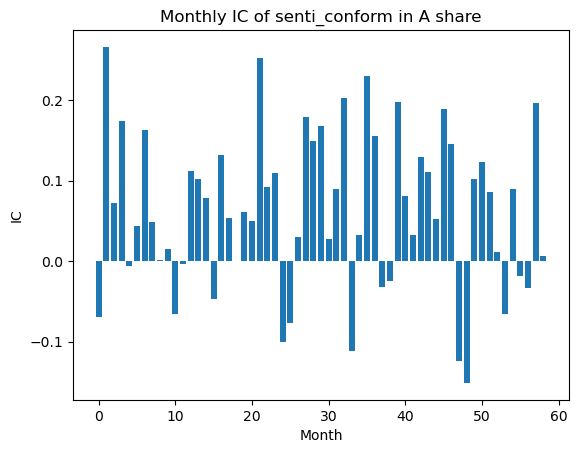

In [ ]:
ic_monthly_a_senti_conform = cal_ic(descriptor_month['senti_conform'], df_price_filtered, MONTH_END)
plt.bar(range(len(ic_monthly_a_senti_conform)), ic_monthly_a_senti_conform)
# plt.bar(ic_weekly_a_senti_conform.index, ic_weekly_a_senti_conform)
# Ê∑ªÂä†Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Monthly IC of senti_conform in A share')
plt.xlabel('Month')
plt.ylabel('IC')

# ÊòæÁ§∫ÂõæË°®
plt.show()

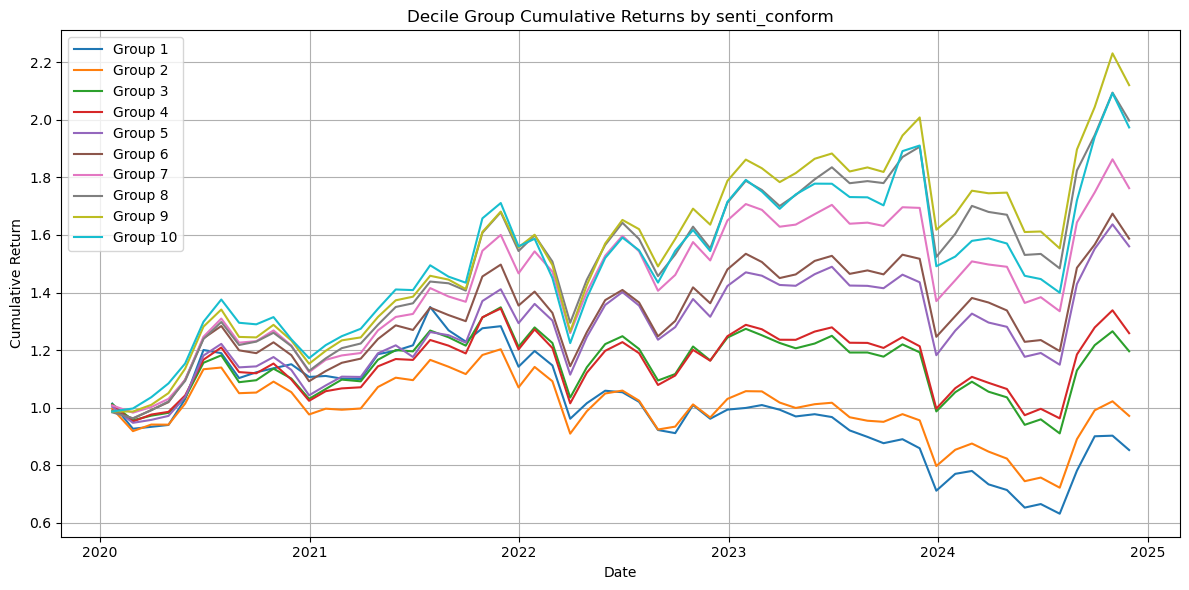

In [ ]:
# ÂàùÂßãÂåñ
quantile_returns = {i: [] for i in range(10)}
rebalance_dates = descriptor_month.index.levels[0].intersection(df_price_filtered.index)

# ÈáçÈááÊ†∑ÁîüÊàêÊúàÊî∂ÁõäÁéá
monthly_returns = df_price_filtered.reindex(rebalance_dates).pct_change().shift(-1)

# ÈÅçÂéÜÊØè‰∏™Ë∞É‰ªìÊó•
for date in rebalance_dates[:-1]:
    try:
        current_factor = descriptor_month.loc[date, 'senti_conform']
        valid_data = current_factor.loc[current_factor.index.intersection(monthly_returns.columns)]

        # ÂàÜÊàê10ÁªÑ
        deciles = pd.qcut(valid_data, q=10, labels=False)
        for i in range(10):
            group_stocks = deciles[deciles == i].index
            group_return = monthly_returns.loc[date, group_stocks].mean()
            quantile_returns[i].append(group_return)
    except Exception as e:
        print(f"{date} Â§±Ë¥•Ôºö{e}")
        for i in range(10):
            quantile_returns[i].append(None)

# ËΩ¨‰∏∫ DataFrameÔºåË°å‰∏∫Êó∂Èó¥ÔºåÂàó‰∏∫ÂàÜÁªÑ
quantile_return_df = pd.DataFrame(quantile_returns, index=rebalance_dates[:-1])

# Á¥ØËÆ°ÂáÄÂÄº
quantile_cumret_df = (1 + quantile_return_df.fillna(0)).cumprod()

# ÁîªÂõæ
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.plot(quantile_cumret_df.index, quantile_cumret_df[i], label=f'Group {i+1}')
plt.title('Decile Group Cumulative Returns by senti_conform')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

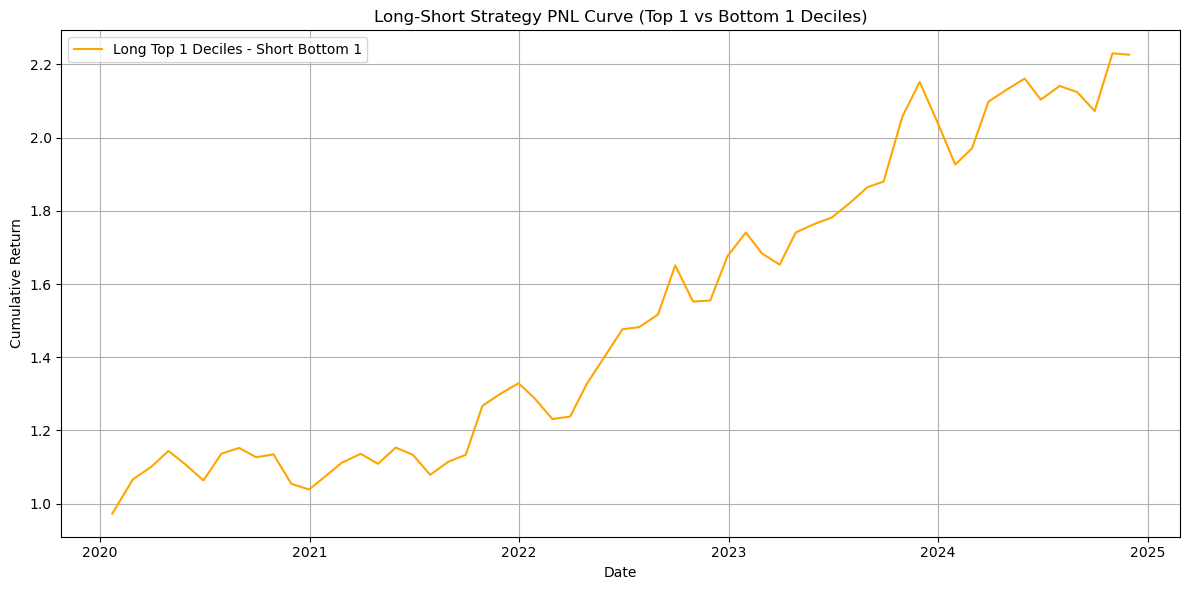

Annual Return        0.1768
Annual Volatility    0.1484
Information Ratio    1.1912
Max Drawdown         0.2255
Win Rate             0.6610
dtype: float64


In [ ]:
# ÊèêÂèñÂèØÁî®Êï∞ÊçÆÁöÑ‰∫§ÈõÜ
common_stocks = descriptor_month.index.get_level_values(1).intersection(df_price_filtered.columns)
descriptor_month = descriptor_month[descriptor_month.index.get_level_values(1).isin(common_stocks)]
rebalance_dates = descriptor_month.index.levels[0].intersection(df_price_filtered.index)

# ÁîüÊàêÊúàÂ∫¶Êî∂ÁõäÁéáÔºöÁî®ÊúàÊú´‰ª∑Ê†ºËÆ°ÁÆó‰∏ãÊúàÊ∂®Ë∑åÂπÖ
monthly_returns = df_price_filtered[common_stocks].reindex(rebalance_dates).pct_change().shift(-1)

# ÂàùÂßãÂåñÁ©∫ÁöÑÊî∂ÁõäÂ∫èÂàó
portfolio_returns = pd.Series(index=rebalance_dates[:-1], name='LongShort_Return', dtype=float)

# ÂõûÊµãÔºöÊØèÊúüÂÅöÂ§ötop2ÁªÑÔºåÂÅöÁ©∫bottom2ÁªÑ
for date in rebalance_dates[:-1]:
    try:
        current_factor = descriptor_month.loc[date, 'senti_conform']
        valid_data = current_factor.loc[current_factor.index.intersection(monthly_returns.columns)]

        # ÂàÜ‰∏∫10ÁªÑ
        deciles = pd.qcut(valid_data, q=10, labels=False)

        # ÂÅöÂ§öÁ¨¨9ÁªÑÂíåÁ¨¨10ÁªÑÔºàlabelÊòØ8Âíå9ÔºâÔºåÂÅöÁ©∫Á¨¨1ÂíåÁ¨¨2ÁªÑÔºàlabelÊòØ0Âíå1Ôºâ
        long_stocks = deciles[deciles.isin([9])].index
        short_stocks = deciles[deciles.isin([0])].index

        # ÂØπÂ∫îÊî∂Áõä
        long_ret = monthly_returns.loc[date, long_stocks].mean()
        short_ret = monthly_returns.loc[date, short_stocks].mean()

        # Â§öÁ©∫ÁªÑÂêàÊî∂Áõä
        portfolio_returns.loc[date] = long_ret - short_ret
    except Exception as e:
        print(f"{date} ÂõûÊµãÂ§±Ë¥•: {e}")
        continue

# ËÆ°ÁÆóÁ¥ØËÆ°ÂáÄÂÄº
cum_ret = (1 + portfolio_returns.dropna()).cumprod()

# üìà ÁªòÂà∂ PNL Êõ≤Á∫ø
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret.values, label='Long Top 1 Deciles - Short Bottom 1', color='orange')
plt.title('Long-Short Strategy PNL Curve (Top 1 vs Bottom 1 Deciles)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# üìä ËÆ°ÁÆóÁª©ÊïàÊåáÊ†á
def compute_metrics(returns):
    ann_ret = (1 + returns).prod() ** (12 / len(returns)) - 1
    ann_vol = returns.std() * np.sqrt(12)
    ir = ann_ret / ann_vol if ann_vol != 0 else np.nan
    max_dd = ((1 + returns).cumprod().cummax() - (1 + returns).cumprod()).max()
    win_rate = (returns > 0).mean()
    return pd.Series({
        'Annual Return': ann_ret,
        'Annual Volatility': ann_vol,
        'Information Ratio': ir,
        'Max Drawdown': max_dd,
        'Win Rate': win_rate
    })

perf = compute_metrics(portfolio_returns.dropna())
print(perf.round(4))


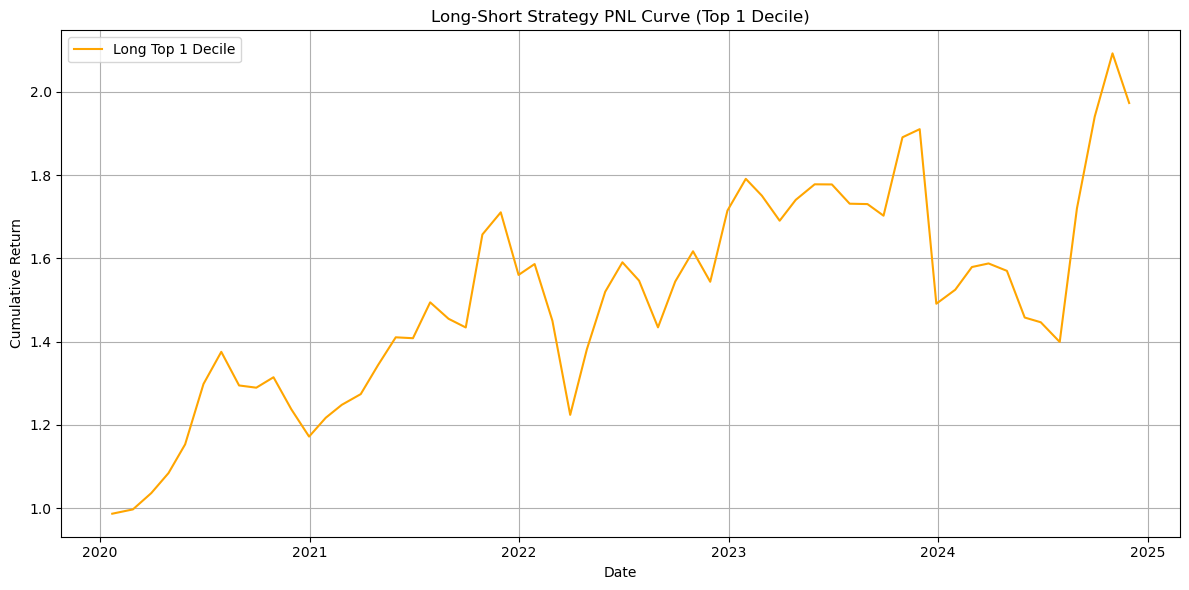

Annual Return        0.1483
Annual Volatility    0.2546
Information Ratio    0.5825
Max Drawdown         0.5111
Win Rate             0.5593
dtype: float64


In [ ]:
# ÊèêÂèñÂèØÁî®Êï∞ÊçÆÁöÑ‰∫§ÈõÜ
common_stocks = descriptor_month.index.get_level_values(1).intersection(df_price_filtered.columns)
descriptor_month = descriptor_month[descriptor_month.index.get_level_values(1).isin(common_stocks)]
rebalance_dates = descriptor_month.index.levels[0].intersection(df_price_filtered.index)

# ÁîüÊàêÊúàÂ∫¶Êî∂ÁõäÁéáÔºöÁî®ÊúàÊú´‰ª∑Ê†ºËÆ°ÁÆó‰∏ãÊúàÊ∂®Ë∑åÂπÖ
monthly_returns = df_price_filtered[common_stocks].reindex(rebalance_dates).pct_change().shift(-1)

# ÂàùÂßãÂåñÁ©∫ÁöÑÊî∂ÁõäÂ∫èÂàó
portfolio_returns = pd.Series(index=rebalance_dates[:-1], name='LongShort_Return', dtype=float)

# ÂõûÊµãÔºöÊØèÊúüÂÅöÂ§ötop2ÁªÑÔºåÂÅöÁ©∫bottom2ÁªÑ
for date in rebalance_dates[:-1]:
    try:
        current_factor = descriptor_month.loc[date, 'senti_conform']
        valid_data = current_factor.loc[current_factor.index.intersection(monthly_returns.columns)]

        # ÂàÜ‰∏∫10ÁªÑ
        deciles = pd.qcut(valid_data, q=10, labels=False)

        # ÂÅöÂ§öÁ¨¨9ÁªÑÂíåÁ¨¨10ÁªÑÔºàlabelÊòØ8Âíå9ÔºâÔºåÂÅöÁ©∫Á¨¨1ÂíåÁ¨¨2ÁªÑÔºàlabelÊòØ0Âíå1Ôºâ
        long_stocks = deciles[deciles.isin([9])].index
#         short_stocks = deciles[deciles.isin([0,1,2,3,4,5])].index

        # ÂØπÂ∫îÊî∂Áõä
        long_ret = monthly_returns.loc[date, long_stocks].mean()
#         short_ret = monthly_returns.loc[date, short_stocks].mean()

        # Â§öÁ©∫ÁªÑÂêàÊî∂Áõä
        portfolio_returns.loc[date] = long_ret
    except Exception as e:
        print(f"{date} ÂõûÊµãÂ§±Ë¥•: {e}")
        continue

# ËÆ°ÁÆóÁ¥ØËÆ°ÂáÄÂÄº
cum_ret = (1 + portfolio_returns.dropna()).cumprod()

# üìà ÁªòÂà∂ PNL Êõ≤Á∫ø
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret.values, label='Long Top 1 Decile', color='orange')
plt.title('Long-Short Strategy PNL Curve (Top 1 Decile)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# üìä ËÆ°ÁÆóÁª©ÊïàÊåáÊ†á
def compute_metrics(returns):
    ann_ret = (1 + returns).prod() ** (12 / len(returns)) - 1
    ann_vol = returns.std() * np.sqrt(12)
    ir = ann_ret / ann_vol if ann_vol != 0 else np.nan
    max_dd = ((1 + returns).cumprod().cummax() - (1 + returns).cumprod()).max()
    win_rate = (returns > 0).mean()
    return pd.Series({
        'Annual Return': ann_ret,
        'Annual Volatility': ann_vol,
        'Information Ratio': ir,
        'Max Drawdown': max_dd,
        'Win Rate': win_rate
    })

perf = compute_metrics(portfolio_returns.dropna())
print(perf.round(4))

In [ ]:
senti_conform_result = descriptor_month['senti_conform'].copy()
# senti_conform_result = backtester.descriptor_all[backtester.param['factor']].copy() # Ëøô‰∏™ÊúâÈóÆÈ¢ò

# Â≠òÂÇ®Á≠âÊùÉ portfolio ÁöÑÁªìÊûú
portfolio = {}

# ÈÅçÂéÜÊØè‰∏™ÊúàÁöÑÂõ†Â≠êÂÄºÔºåÂèñ top 20%Ôºàq=8,9Ôºâ
for date, group in senti_conform_result.groupby(level=0):
    try:
        # ÂéªÊéâÁº∫Â§±ÂÄº
        valid_group = group.dropna()
        if len(valid_group) < 10:  # ÈÅøÂÖçÊ†∑Êú¨Â§™Â∞èÂØºËá¥ qcut Êä•Èîô
            continue

        # ÂàÜ‰ΩçÂàÜÁªÑ
        quantiles = pd.qcut(valid_group, q=10, labels=False)
        top10 = quantiles[(quantiles == 9)].index

        num_stocks = len(top10)
        weights = pd.Series(1 / num_stocks, index=top10, name='weight')
        portfolio[date] = weights
    except Exception as e:
        print(f"{date} Â§ÑÁêÜÂ§±Ë¥•Ôºö{e}")
        continue

        # Áº©Â∞èÊó•ÊúüËåÉÂõ¥
month_end_dates = pd.DatetimeIndex(MONTH_END)
min_date = df_price_filtered.index.min()
max_date = df_price_filtered.index.max()
relevant_month_ends = month_end_dates[(month_end_dates >= min_date) & (month_end_dates <= max_date)]

# ËÇ°Á•®Êî∂ÁõäÔºàÂÖàÈ™åÊï∞ÊçÆÔºâ
stocks_rets = df_price_filtered.pct_change().fillna(0)

# Backtest
ret_portfolio = Backtest(stocks_rets, portfolio, cost=0.0015).run()

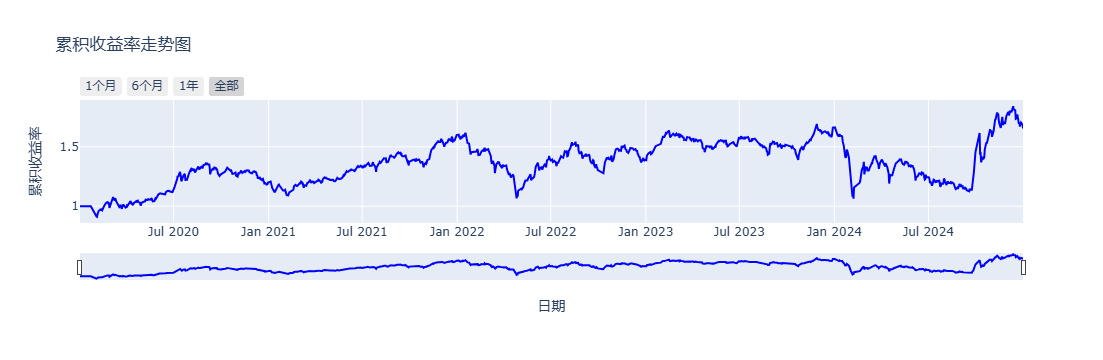

In [ ]:
# ÂÅáËÆæret_portfolioÊòØ‰Ω†ÁöÑÁ¥ØÁßØÊî∂ÁõäÁéáSeriesÔºåÁ¥¢ÂºïÊòØÊó•Êúü
# ÂàõÂª∫ÂõæÂΩ¢
fig = go.Figure()

# Ê∑ªÂä†Á¥ØÁßØÊî∂ÁõäÁéáÁ∫ø
fig.add_trace(
    go.Scatter(
        x=ret_portfolio.index,
        y=ret_portfolio.values,
        mode='lines',
        name='Á¥ØÁßØÊî∂ÁõäÁéá',
        line=dict(color='blue', width=2)
    )
)

# ËÆæÁΩÆÂõæÂΩ¢Â∏ÉÂ±Ä
fig.update_layout(
    title='Á¥ØÁßØÊî∂ÁõäÁéáËµ∞ÂäøÂõæ',
    xaxis_title='Êó•Êúü',
    yaxis_title='Á¥ØÁßØÊî∂ÁõäÁéá',
    hovermode='x unified',
    
    # ‰ª•‰∏ãËÆæÁΩÆÂ¢ûÂº∫‰∫Ü‰∫§‰∫íÊÄß
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1‰∏™Êúà", step="month", stepmode="backward"),
                dict(count=6, label="6‰∏™Êúà", step="month", stepmode="backward"),
                dict(count=1, label="1Âπ¥", step="year", stepmode="backward"),
                dict(count=1, label="ÂÖ®ÈÉ®", step="all")
            ])
        ),
        rangeslider=dict(visible=True),  # ÊòæÁ§∫ËåÉÂõ¥ÊªëÂùó
        type="date"
    ),
    
    # yËΩ¥Ëá™Âä®Áº©Êîæ
    yaxis=dict(fixedrange=False)
)

# ÊòæÁ§∫ÂõæÂΩ¢
fig.show()

In [ ]:
create_return_risk_metrics(ret_portfolio.pct_change(), period='daily')

annual_return        11.04%
annual_volatility    25.36%
sharpe_ratio           0.54
max_drawdown         37.15%
omega_ratio           -1.11
calmar_ratio           0.37
sortino_ratio          0.75
dtype: object